In [19]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib as mpl
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [35]:
util.set_sns_style(style='dark')
%matplotlib notebook

In [2]:
def add_colorwheel(fig, cmap='hsv', axes=[0.7, 0.7, 0.3, 0.3], 
                   theta_range=[-np.pi, np.pi], deg2plot=None):
    display_axes = fig.add_axes(axes, projection='polar')
    #display_axes._direction = max(theta_range) #2*np.pi ## This is a nasty hack - using the hidden field to 
                                      ## multiply the values such that 1 become 2*pi
                                      ## this field is supposed to take values 1 or -1 only!!
    #norm = mpl.colors.Normalize(0.0, 2*np.pi)
    norm = mpl.colors.Normalize(theta_range[0], theta_range[1])

    # Plot the colorbar onto the polar axis
    # note - use orientation horizontal so that the gradient goes around
    # the wheel rather than centre out
    quant_steps = 2056
    cb = mpl.colorbar.ColorbarBase(display_axes, cmap=mpl.cm.get_cmap(cmap, quant_steps),
                                       norm=norm, orientation='horizontal')
    # aesthetics - get rid of border and axis labels                                   
    cb.outline.set_visible(False)                                 
    #display_axes.set_axis_off()
    #display_axes.set_rlim([-1,1])
    if deg2plot is not None:
        display_axes.plot([0, deg2plot], [0, 1], 'k')
    
    display_axes.set_theta_zero_location('N')
    display_axes.set_theta_direction(-1)  # theta increasing clockwise

    return display_axes


In [3]:
%matplotlib notebook

In [4]:
df = pd.DataFrame(data={'ft_posx': [0, 1, 1, 1.5, 2, 3, 2, 2, 1.5, 1.25, .5], 
                          'ft_posy': [0, 1, 2, 2.5, 2, 1, 1, 1, 1, 0.5, -2],
                          'time': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}) #np.array([[0, 0], [1, 1]])
df

,ft_posx,ft_posy,time
0,0.00,0.0,0
1,1.00,1.0,1
2,1.00,2.0,2
3,1.50,2.5,3
4,2.00,2.0,4
5,3.00,1.0,5
6,2.00,1.0,6
7,2.00,1.0,7
8,1.50,1.0,8
9,1.25,0.5,9


In [5]:
dists = np.linalg.norm(df.diff(), axis=1)
dists

array([       nan, 1.73205081, 1.41421356, 1.22474487, 1.22474487,
       1.73205081, 1.41421356, 1.        , 1.11803399, 1.14564392,
       2.79508497])

# calculate angle bw

In [6]:
df['heading-diff-deg'] = np.rad2deg(np.arctan2(df.diff()['ft_posx'], df.diff()['ft_posy']))
df['heading-grad-deg'] = np.rad2deg(np.arctan2(np.gradient(df['ft_posx']), np.gradient(df['ft_posy'])))
df['heading-grad'] = np.arctan2(np.gradient(df['ft_posx']), np.gradient(df['ft_posy']))

In [30]:
nextp_y = df['ft_posy'].shift(-1)-df['ft_posy']
nextp_x = df['ft_posx'].shift(-1)-df['ft_posx']
nextp = np.arctan2(nextp_y, nextp_x)

prevp_x = df['ft_posx'] - df['ft_posx'].shift()
prevp_y = df['ft_posy'] - df['ft_posy'].shift()
prevp = np.arctan2(prevp_y, prevp_x)

df['shifted'] = np.rad2deg( nextp - prevp )

In [31]:
# angle = atan2(vector2.y, vector2.x) - atan2(vector1.y, vector1.x);

-2.8501358591119264 3.141592653589793


<IPython.core.display.Javascript object>


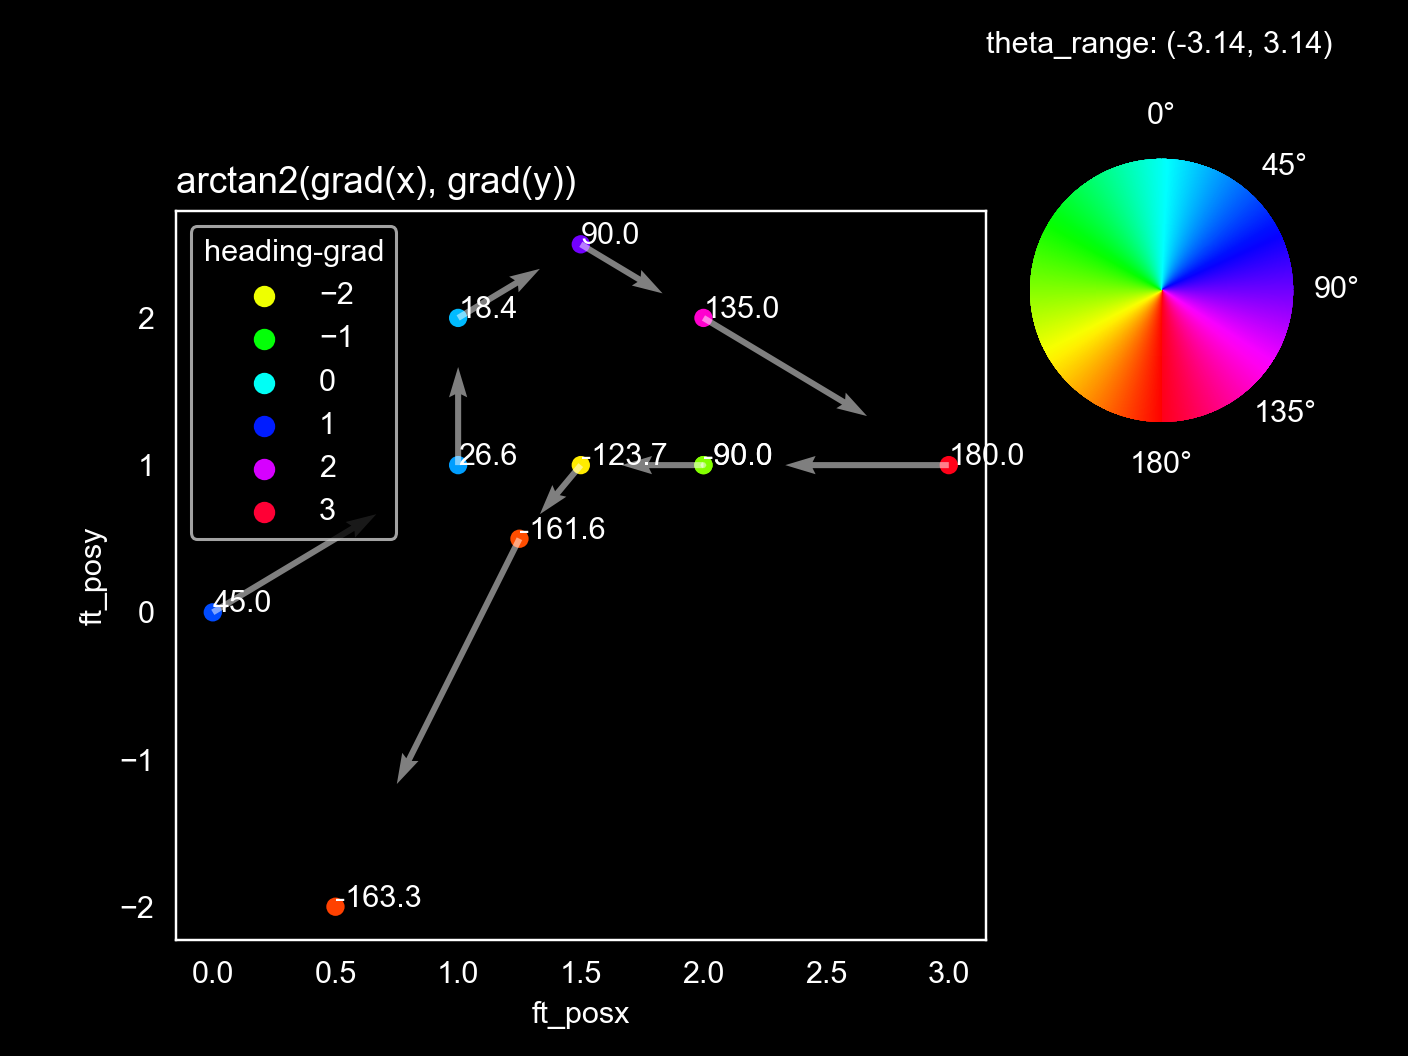

In [50]:
print(df['heading-grad'].min(), df['heading-grad'].max())
theta_range = (-np.pi, np.pi)
norm = mpl.colors.Normalize(theta_range[0], theta_range[1])
#--------------------------------------------
hue_var= 'heading-grad'
#--------------------------------------------
cmap='hsv'
fig, ax = pl.subplots()
ax.set_title('arctan2(grad(x), grad(y))', loc='left')
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue=hue_var, ax=ax, palette=cmap, 
                edgecolor='none', hue_norm=norm)
for i, row_ in df.iterrows():
    ax.text(row_['ft_posx'], row_['ft_posy'], '{:.1f}'.format(np.rad2deg(row_[hue_var])))
    
uu = df['ft_posx'].shift(periods=-1) - df['ft_posx']
vv = df['ft_posy'].shift(periods=-1) - df['ft_posy']
ax.quiver(df['ft_posx'].values, df['ft_posy'].values, uu, vv, color='w',# color=colormap(norm(colors)), 
          angles='xy', scale_units='xy', scale=1.5, alpha=0.5)
display_axes = util.add_colorwheel(fig, theta_range=(-np.pi, np.pi), #deg2plot=np.deg2rad(-110),
                             cmap=cmap, axes=[0.7, 0.6, 0.25, 0.25])
fig.text(0.7, 0.95, 'theta_range: ({:.2f}, {:.2f})'.format(theta_range[0], theta_range[1]))
pl.subplots_adjust(top=0.8, right=0.7)

In [33]:

def convert_cw(v):
    vv=v.copy()
    vv[v<0] += 2*np.pi
#     if angle < 0:
#         angle += 2 * math.pi
    #vv = (180. / np.pi) * v
    return vv  #(180 / math.pi) * angle

In [25]:
print(df['heading-grad'].min(), df['heading-grad'].max())


-2.8501358591119264 3.141592653589793


In [27]:
df['heading-grad-cw'] = convert_cw(df['heading-grad'])
print(df['heading-grad-cw'].min(), df['heading-grad-cw'].max())

0.3217505543966422 4.71238898038469


<IPython.core.display.Javascript object>


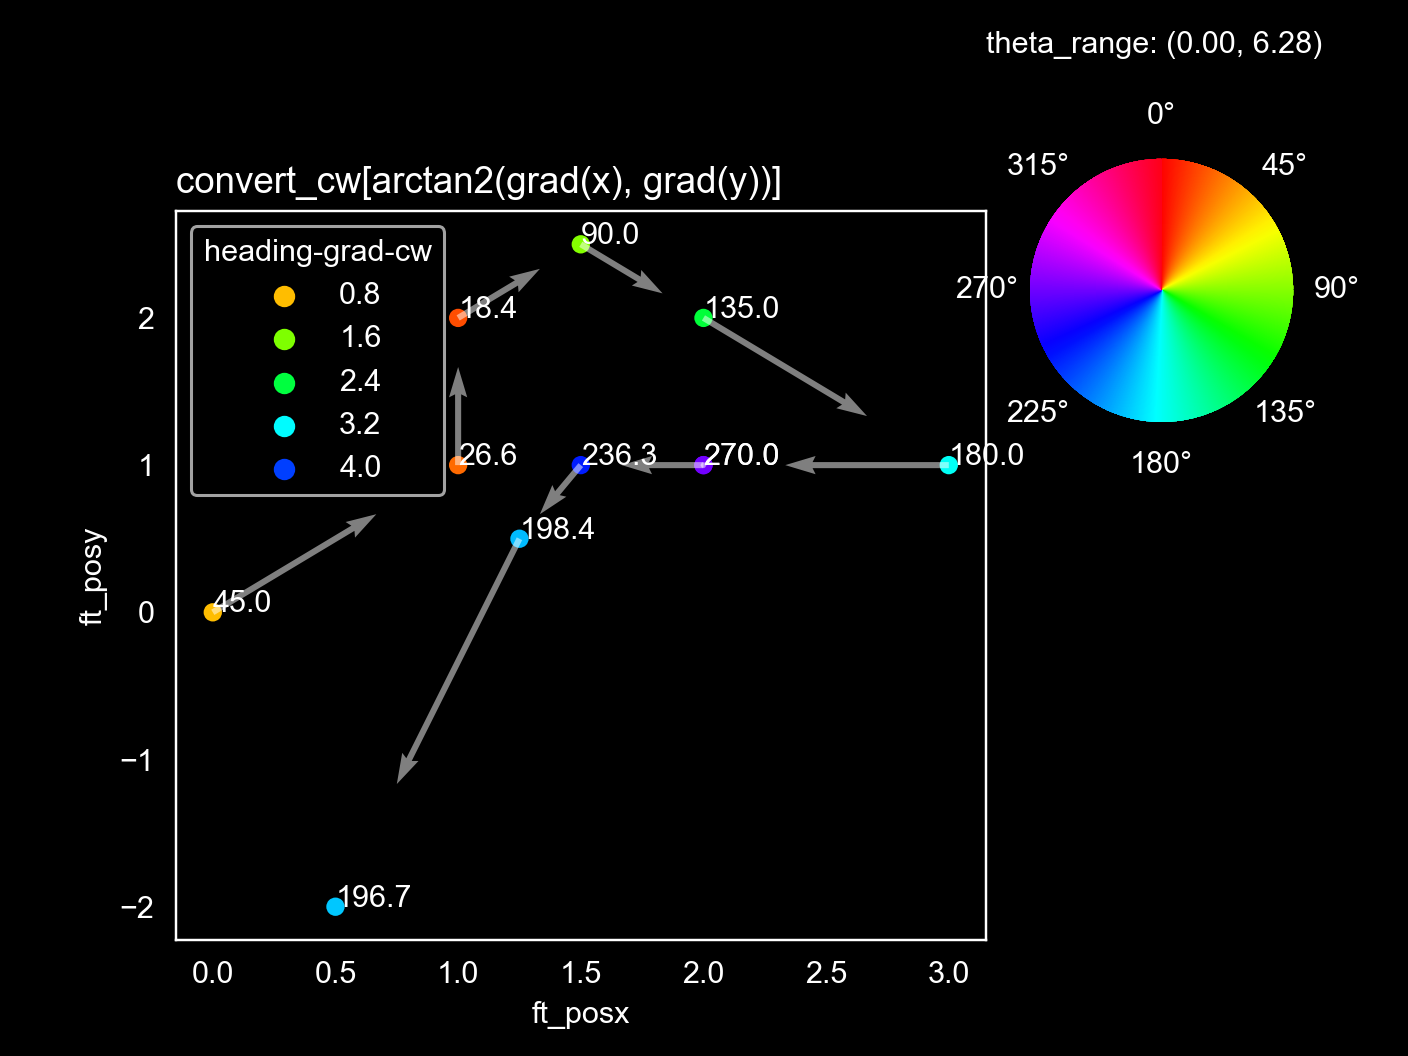

In [52]:
theta_range = (0, 2*np.pi) #(-np.pi, np.pi)
norm = mpl.colors.Normalize(theta_range[0], theta_range[1])
#--------------------------------------------
hue_var= 'heading-grad-cw'
#--------------------------------------------
cmap='hsv'
fig, ax = pl.subplots()
ax.set_title('convert_cw[arctan2(grad(x), grad(y))]', loc='left')
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue=hue_var, ax=ax, palette=cmap, 
                edgecolor='none', hue_norm=norm)
for i, row_ in df.iterrows():
    ax.text(row_['ft_posx'], row_['ft_posy'], '{:.1f}'.format(np.rad2deg(row_[hue_var])))
    
uu = df['ft_posx'].shift(periods=-1) - df['ft_posx']
vv = df['ft_posy'].shift(periods=-1) - df['ft_posy']
ax.quiver(df['ft_posx'].values, df['ft_posy'].values, uu, vv, color='w', #color=colormap(norm(colors)), 
          angles='xy', scale_units='xy', scale=1.5, alpha=0.5)
display_axes = util.add_colorwheel(fig, theta_range=theta_range, #deg2plot=np.deg2rad(-110),
                             cmap=cmap, axes=[0.7, 0.6, 0.25, 0.25])
fig.text(0.7, 0.95, 'theta_range: ({:.2f}, {:.2f})'.format(theta_range[0], theta_range[1]))
pl.subplots_adjust(top=0.8, right=0.7)

In [20]:
df

,ft_posx,ft_posy,time,angle,heading,ang2,heading_deg
0,0.00,0.0,0,NaN,0.785398,NaN,45.000000
1,1.00,1.0,1,45.000000,1.107149,45.000000,63.434949
2,1.00,2.0,2,90.000000,1.249046,-45.000000,71.565051
3,1.50,2.5,3,45.000000,0.000000,-90.000000,0.000000
4,2.00,2.0,4,-45.000000,-0.785398,0.000000,-45.000000
5,3.00,1.0,5,-45.000000,-1.570796,225.000000,-90.000000
6,2.00,1.0,6,180.000000,3.141593,-180.000000,180.000000
7,2.00,1.0,7,0.000000,3.141593,180.000000,180.000000
8,1.50,1.0,8,180.000000,-2.553590,-296.565051,-146.309932
9,1.25,0.5,9,-116.565051,-1.892547,9.865807,-108.434949


In [25]:

flip_ix = df[df['heading'] < 0].index.tolist()
flipped_ang = df.loc[flip_ix, 'heading'] % 2*np.pi
df['heading_cont'] = df['heading'].copy()
df.loc[flip_ix, 'heading_cont'] = flipped_ang

<IPython.core.display.Javascript object>


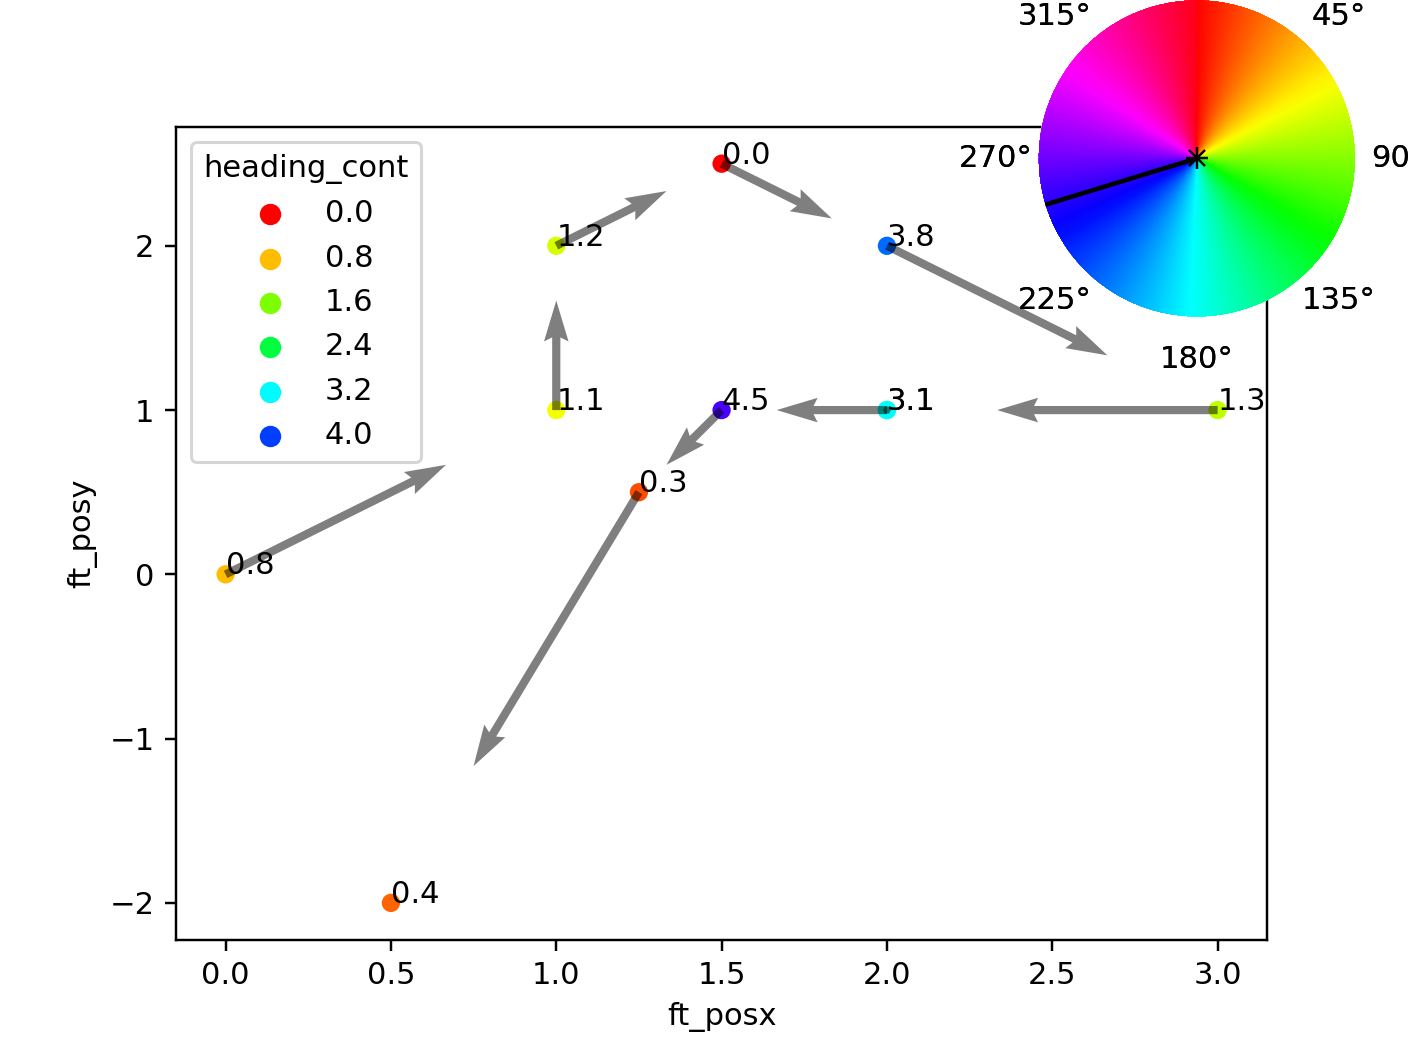

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_21867/3343633695.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = mpl.colorbar.ColorbarBase(display_axes, cmap=mpl.cm.get_cmap(cmap, quant_steps),


In [26]:
hue_var = 'heading_cont'
cmap='hsv' #'gist_rainbow'
theta_range = (-np.pi, np.pi) if hue_var=='heading' else (0, 2*np.pi) #(0, 360) #(-np.pi, np.pi)
norm = mpl.colors.Normalize(theta_range[0], theta_range[1])

fig, ax = pl.subplots()
sns.scatterplot(data=df, x='ft_posx', y='ft_posy', hue=hue_var, ax=ax, palette=cmap, 
                edgecolor='none', hue_norm=norm)
for i, row_ in df.iterrows():
    ax.text(row_['ft_posx'], row_['ft_posy'], '{:.1f}'.format(row_[hue_var]))
    
uu = df['ft_posx'].shift(periods=-1) - df['ft_posx']
vv = df['ft_posy'].shift(periods=-1) - df['ft_posy']
ax.quiver(df['ft_posx'].values, df['ft_posy'].values, uu, vv, #color=colormap(norm(colors)), 
          angles='xy', scale_units='xy', scale=1.5, alpha=0.5)
display_axes = add_colorwheel(fig, theta_range=(0, 2*np.pi), deg2plot=np.deg2rad(-107),
                             cmap=cmap)

display_axes = add_colorwheel(fig, theta_range=(0, 2*np.pi), deg2plot=np.deg2rad(253),
                             cmap=cmap)